# Infinite dimensional Spaces

Infinite dimensional spaces are needed when working with functions, because functions can be thought of as vectors with infinitely many entries. The only kind of infinite dimensional space that can be used now is the peicewise continuous bounded space $PC_b$

Before creating this space we need to define a domain on which the functions inhabiting this space are defined. For this example I will use $[0,1]$. 

In [19]:
from sola.main_classes.domains import *
from sola.main_classes.spaces import *
from sola.main_classes.functions import *
from sola.aux.function_creator import *
my_domain = HyperParalelipiped(bounds=[[0,1]])

Now that we have the domain, we will create the space $PC_b[[0,1]]$:

In [20]:
PCB = PCb(domain=my_domain)

We can draw some quasi-random members from this space:

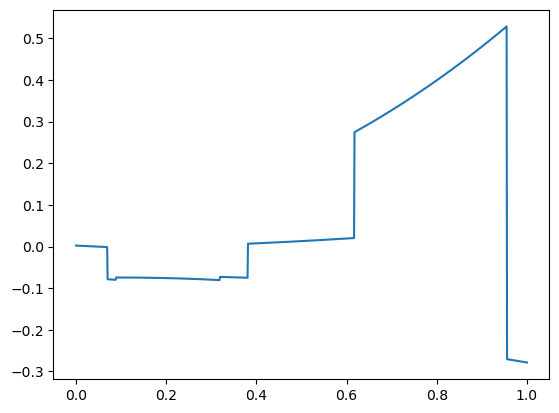

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
function = PCB.random_member()

plt.plot(my_domain.mesh, function.evaluate(my_domain.mesh))
plt.show()

And we can even create our own functions via mouse drawings. To see how to do this see the python file "draw_functions.py". The interactive window needed for drawing doesn't work well with jupyter notebooks. (not implemented this yet)

We can also add these functions as members to our space.

In [22]:
gaussian = Gaussian_1D(my_domain, center=0.5, width=0.2)
boxcar = Boxcar_1D(my_domain, center=0.2, width=0.2)
bump = Bump_1D(my_domain, center=0.7, width=0.4)

PCB.add_member(member_name='gaussian', member=gaussian)
PCB.add_member(member_name='boxcar', member=boxcar)
PCB.add_member(member_name='bump', member=bump)

print(PCB.members)

{'gaussian': <sola.main_classes.functions.Gaussian_1D object at 0x7fbbf1d88c10>, 'boxcar': <sola.main_classes.functions.Boxcar_1D object at 0x7fbbf1da7bd0>, 'bump': <sola.main_classes.functions.Bump_1D object at 0x7fbbf1d83bd0>}


We can also take the inner product between two functions. By definition this is:
$$
\begin{equation}
    \left< f, g \right>_{PC_b[[0,1]]} = \int_0^1 f(r) g(r) dr 
\end{equation}
$$

In [23]:
print(PCB.inner_product(gaussian, boxcar))

9.753142577736591e-09


And the induced norm:

In [24]:
print(PCB.norm(boxcar))

2.2371868507134143


Currently there is no method for checking if something is a member or not of this space. I will try to implement such a method at some point